# **Brain Tumor Classification**

Drive Link for Dataset : https://drive.google.com/file/d/1PEMwU_UWa-Jq1KUjcUu4Y3EJ_3yloAFo/view?usp=sharing 


**Name:** Shriya Haral

# What is a Brain Tumor? 

A cancerous or non-cancerous mass or growth of abnormal cells in the brain.
Tumours can start in the brain, or cancer elsewhere in the body can spread to the brain.
Symptoms include new or increasingly strong headaches, blurred vision, loss of balance, confusion and seizures. In some cases, there may be no symptoms.
Treatments include surgery, radiation and chemotherapy.

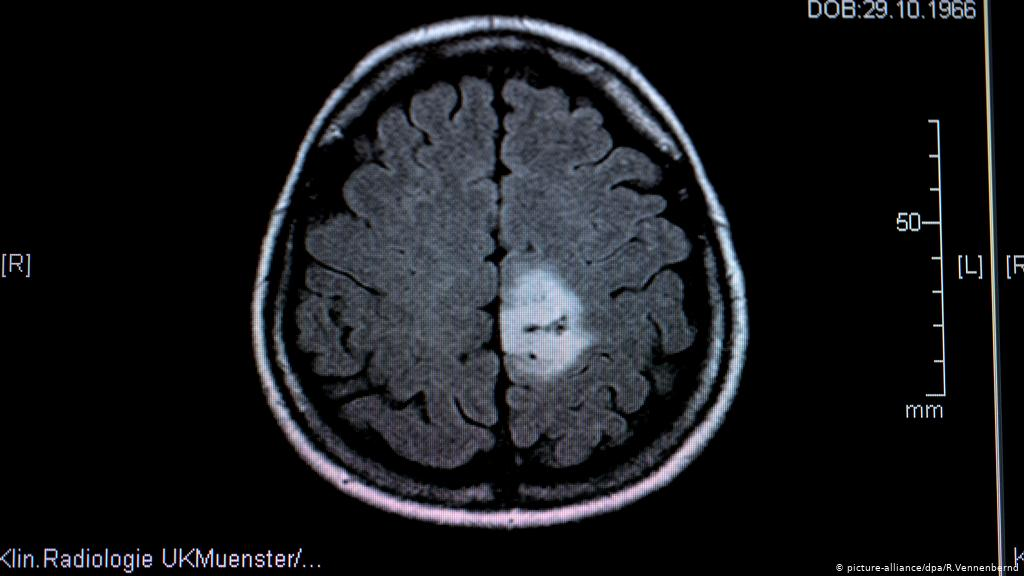

#**Methodology followed to build a CNN model is as follows:**
 1. Dataframe requirements:
    1. Importing the required libraries
    2. Dataset Description 
    3. Downloading and unzipping folder to access images

2. Splitting the data into train-test-split

3. Data Augmentation
    1. Creating a Training, Validation and Testing dataset using Flow_from_directory method of ImageDataGenerator and batch size.

    2. Visualizing the images of the brain
    

4. Modeling:

 **A] Without callbacks:**
    1. Model Architecture
    2. Compiling the model
    3. Training the model without callbacks
    4. Visualizing the plots for accuracy and losses
    5. Evaluating the model
    6. Generating a classification report
    7. Generating a confusion Matrix

 **B]With callbacks:**

    1. Model Architecture
    2. Compiling the model
    3. Training the model with callbacks
    4. Visualizing the plots for accuracy and losses
    5. Evaluating the model
    6. Generating a classification report
    7. Generating a confusion Matrix
        
        
5. Testing the model

6. Conclusion

7. References


# **1. Dataframe requirements:**

**1. Importing the required libraries**


In [ ]:
import os  #provides functions for interacting with the operating system.
import pandas as pd #allows various data manipulation operations such as merging, reshaping, selecting, as well as data cleaning, and data wrangling features.
import numpy as np #makes many mathematical operations used widely in scientific computing fast and easy to use
import warnings        #For ignoring all the warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt  #creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc

%matplotlib inline
import seaborn as sns #helps you explore and understand your data
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report


#tensorflow libraries
import tensorflow as tf #Tensorflow library 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout,Flatten, Conv2D 
from tensorflow.keras.optimizers import Adam  #
from tensorflow.keras.losses import SparseCategoricalCrossentropy 
from keras.preprocessing.image import ImageDataGenerator  #for ImageDataGeneration 
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping  #For callbacks

**2. Data Description**

The image data that was used for this problem is Brain MRI Images for Brain Tumor Detection. It conists of MRI scans of two classes:

**NO** - no tumor, encoded as healthy 

**YES** - tumor, encoded as Cancer

**3. Downloading and unzipping folder to access images**

In [ ]:
!unzip 'Dataset.zip' #Unzipping the desired folder containing the images as the dataset

Archive:  Dataset.zip
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1004).jpg  
  inflating: Brain Tumor Data Set/B

In [ ]:
# Creating dataframe by iterating through filepaths
tumor_dir=r'/content/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor'
healthy_dir=r'/content/Brain Tumor Data Set/Brain Tumor Data Set/Healthy'
filepaths = []
labels= []
dict_list = [tumor_dir, healthy_dir]
for i, j in enumerate(dict_list):
    flist=os.listdir(j)
    for f in flist:
        fpath=os.path.join(j,f)
        filepaths.append(fpath)
        if i==0:
          labels.append('cancer')
        else:
          labels.append('healthy') 
    
Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
tumor_data = pd.concat([Fseries,Lseries], axis=1)
tumor_df = pd.DataFrame(tumor_data)
print(tumor_df.head())
print(tumor_df["labels"].value_counts())

                                           filepaths  labels
0  /content/Brain Tumor Data Set/Brain Tumor Data...  cancer
1  /content/Brain Tumor Data Set/Brain Tumor Data...  cancer
2  /content/Brain Tumor Data Set/Brain Tumor Data...  cancer
3  /content/Brain Tumor Data Set/Brain Tumor Data...  cancer
4  /content/Brain Tumor Data Set/Brain Tumor Data...  cancer
cancer     2513
healthy    2087
Name: labels, dtype: int64


In [ ]:
#shape of datatset
tumor_df.shape

(4600, 2)

# 2. **Splitting Tumor Data using train_test_split**

In [ ]:
#splitting data
train_images, test_images = train_test_split(tumor_df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(tumor_df, test_size=0.2, random_state=42)

In [ ]:
#shape of splitted data
print(train_set.shape)
print(test_images.shape)
print(val_set.shape)
print(train_images.shape)

(3680, 2)
(1380, 2)
(920, 2)
(3220, 2)


# 3. Data Augmentation:

**1. Creating a Training, Validation and Testing dataset using Flow_from_directory method of ImageDataGenerator and batch size.**

**Image Data Generator:** The generator will run through your image data and apply random transformations to each individual image as it is passed to the model so that it never sees the exact same image twice during training. These transformations are parameters on the generator that can be set when instantiated and can include rotations, shears, flips, and zooms. The benefit here is that the model will become more robust as it trains on images that are slightly distorted, and it helps to prevent the model from learning noise in your data such as where features are located in the image.

In [ ]:
#Generate batches of tensor image data with real-time data augmentation.
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)
train = image_gen.flow_from_dataframe(dataframe= train_set,x_col="filepaths",y_col="labels",
                                      target_size=(244,244),
                                      color_mode='rgb',
                                      class_mode="categorical", #used for Sequential Model
                                      batch_size=32,
                                      shuffle=False            #do not shuffle data
                                     )

Found 3680 validated image filenames belonging to 2 classes.


In [ ]:
test = image_gen.flow_from_dataframe(dataframe= test_images,x_col="filepaths", y_col="labels",
                                     target_size=(244,244),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=32,
                                     shuffle= False
                                    )

Found 1380 validated image filenames belonging to 2 classes.


In [ ]:
val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths", y_col="labels",
                                    target_size=(244,244),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=32,
                                    shuffle=False
                                   )

Found 920 validated image filenames belonging to 2 classes.


In [ ]:
classes=list(train.class_indices.keys())
print (classes)

['cancer', 'healthy']


**2. Visualizing Images of Brain**

In [ ]:
def show_brain_images(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen) # get a sample batch from the generator 
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2 #scale images between 0 and 1
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color="green",fontsize=16)
        plt.axis('off')
    plt.show()

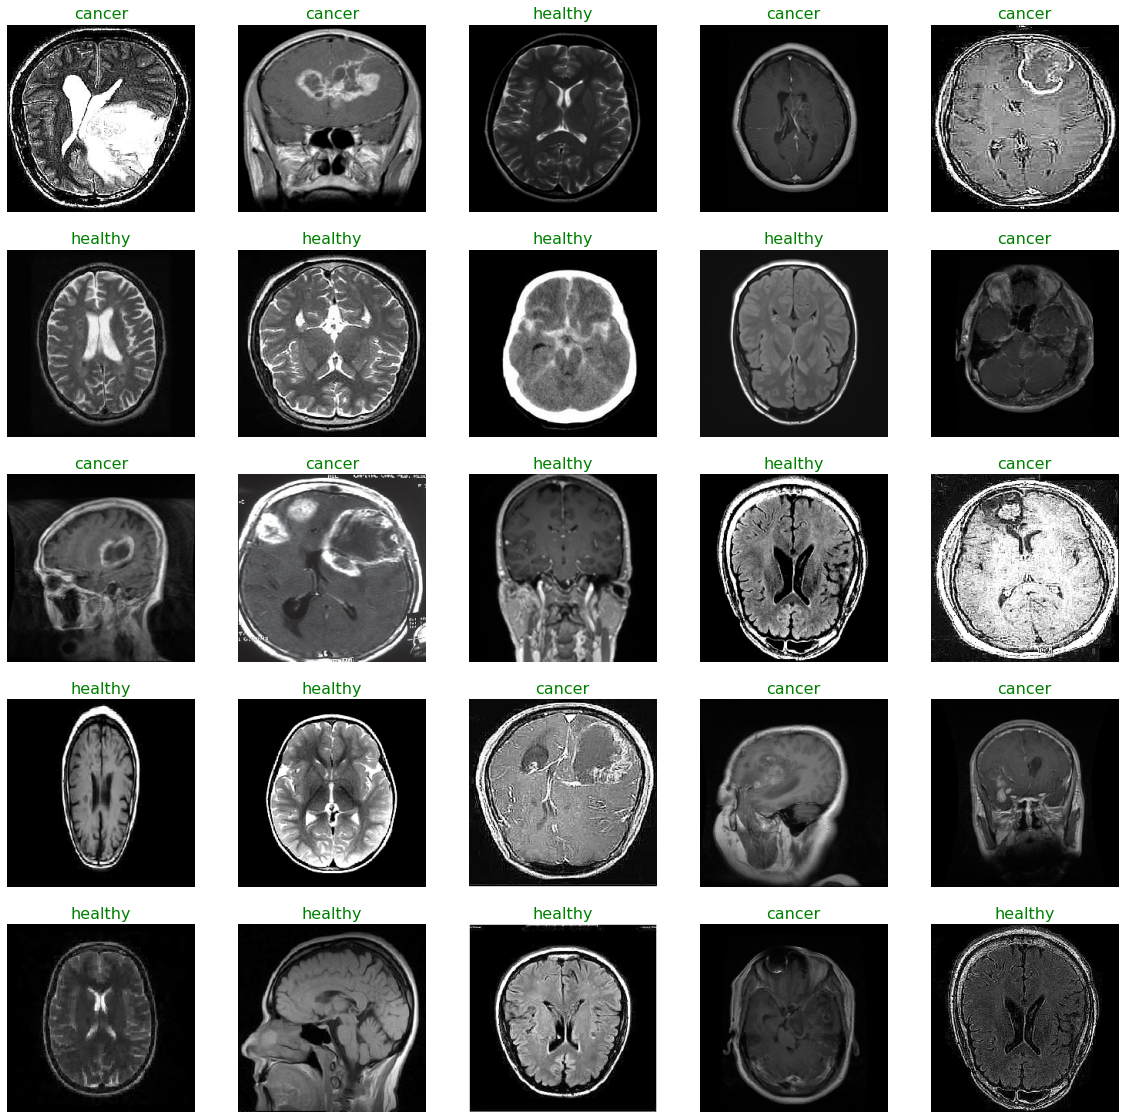

In [ ]:
show_brain_images(train)

# 4. Model Training

The model consists of 6 (Convoluion + Pooling layers + Dropout) layers with a Dense layer. The activation function used was "Relu".

A CNN architecture comprises of multiple neural layers. The three main type of layers used are:
1. **Convolution layers**: The convolutional layer computes the convolutional operation of the input tensor images using kernel filters to extract fundamental features. 

    The convolution operation Paramters of Conv2D are

    1. The filter size used in each convolution layer: size (3,3)
    2. The first parameter is the number of filters
    3. Input shape is the tensor image (RGB) input from the training_datagen
    4. Padding used is of type 'same' (default)
    5. Activation is applied after convolution occurs (Relu is used)
    6. As the architecture deepens the number of filters are increased to extract minute features from the images.


2. **Pooling layers**: They are mainly used to reduce the dimensions of the tensor output vector after convolution opertion. This reduces the number of trainable paramters in back-propogation step. They are usually placed between 2 convolution layers. The filter size used in each MaxPool2D: size (2,2)


3. **Dense Layers**: The Fully connected dense layer are usually placed before the output dense layer and form the last few layers of a CNN Architecture. In this layer, the input image from the previous layers are flattened and fed to the fully connected layer. In this stage, the classification process begins to take place. The output layer is the last dense layer in the CNN architecture. It has 1 neuron for a binary classification problem and the activation function of "sigmoid" is used.



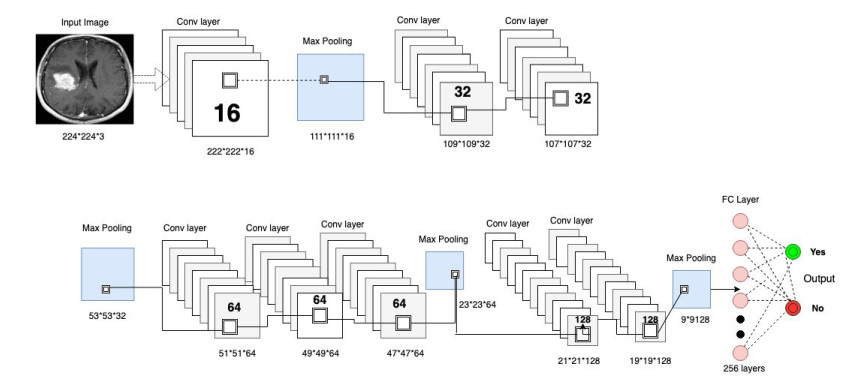

In [ ]:
# to clear the session everytime the notebook is re-run
keras.backend.clear_session()

**1. Model Architecture**

In [ ]:
#Defining Sequential Model
model = Sequential()
# defining conv-pool layer
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1), activation="relu", padding="valid",
               input_shape=(244,244,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

#adding flatten layer
model.add(Flatten())

#adding dense layers with dropout
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(64, activation="relu"))

#Output layer
model.add(Dense(2, activation="sigmoid")) #Sigmoid is used for binary. Use Softmax for Mutliclass.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 242, 242, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 121, 121, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 468512)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               59969664  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1

**2. Compiling the model**

In [ ]:
model.compile(optimizer="adam", # one of the best optimisers
              loss="categorical_crossentropy", # since it is categorical classification
              metrics=["accuracy"])# performance metrics used
#Summary
model.summary()

**3. Training the model withoutcallbacks.**

In [ ]:
#fitting model
History = model.fit(train, validation_data= val, epochs=10,verbose=1)

Epoch 1/10
115/115 [==============================] - 175s 2s/step - loss: 2.2479 - accuracy: 0.6899 - val_loss: 0.3454 - val_accuracy: 0.8739
Epoch 2/10
115/115 [==============================] - 169s 1s/step - loss: 0.3098 - accuracy: 0.8818 - val_loss: 0.1880 - val_accuracy: 0.9141
Epoch 3/10
115/115 [==============================] - 168s 1s/step - loss: 0.1723 - accuracy: 0.9394 - val_loss: 0.1087 - val_accuracy: 0.9587
Epoch 4/10
115/115 [==============================] - 169s 1s/step - loss: 0.1214 - accuracy: 0.9611 - val_loss: 0.0886 - val_accuracy: 0.9728
Epoch 5/10
115/115 [==============================] - 167s 1s/step - loss: 0.0585 - accuracy: 0.9815 - val_loss: 0.0852 - val_accuracy: 0.9685
Epoch 6/10
115/115 [==============================] - 166s 1s/step - loss: 0.0365 - accuracy: 0.9902 - val_loss: 0.0647 - val_accuracy: 0.9783
Epoch 7/10
115/115 [==============================] - 166s 1s/step - loss: 0.0693 - accuracy: 0.9832 - val_loss: 0.2137 - val_accuracy: 0.9402

In [ ]:
model.save('Brain_tumor.h5')  #Saving the model in .h5 for further processes.

**4. Visualizing the plots for accuracy and losses**

Text(0.5, 1.0, 'Training and Validation Accuracy')

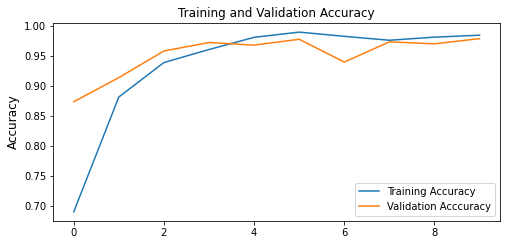

In [ ]:
acc = History.history["accuracy"] # report of model
val_acc = History.history["val_accuracy"] # history of validation data

loss = History.history["loss"]        # Training loss
val_loss = History.history["val_loss"] # validation loss

plt.figure(figsize=(8,8))
plt.subplot(2,1,1) # 2 rows and 1 columns
#plotting respective accuracy
plt.plot(acc,label="Training Accuracy")
plt.plot(val_acc, label="Validation Acccuracy")

plt.legend()
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training and Validation Accuracy", fontsize=12)

Text(0.5, 1.0, 'Training and Validation Losses')

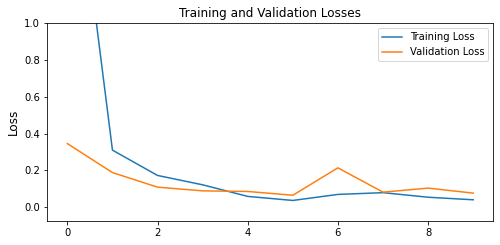

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
 
plt.plot(loss, label="Training Loss")      #Training loss
plt.plot(val_loss, label="Validation Loss") # Validation Loss

plt.legend()
plt.ylim([min(plt.ylim()),1])
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Losses", fontsize=12)

**5. Evaluating the model**

In [ ]:
model.evaluate(test, verbose=1)   #Evaluating the model

44/44 [==============================] - 18s 410ms/step - loss: 0.0521 - accuracy: 0.9862


[0.05209921672940254, 0.9862318634986877]

In [ ]:
pred = model.predict(test)
pred = np.argmax(pred, axis=1) #pick class with highest  probability

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

**6. Generating the classification report**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_test = test_images.labels # set y_test to the expected output
print(classification_report(y_test, pred2))  #Generating the classification report 
print("Accuracy of the Model:",accuracy_score(y_test, pred2)*100,"%") #Accuracy of the model 

              precision    recall  f1-score   support

      cancer       0.98      0.99      0.99       779
     healthy       0.99      0.98      0.98       601

    accuracy                           0.99      1380
   macro avg       0.99      0.99      0.99      1380
weighted avg       0.99      0.99      0.99      1380

Accuracy of the Model: 98.62318840579711 %


**7. Generating a Confusion Matrix**

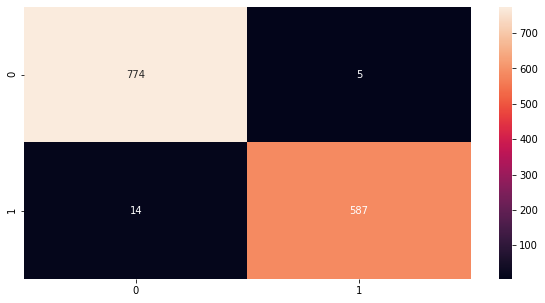

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize = (10,5))
cm = confusion_matrix(y_test, pred2)
sns.heatmap(cm, annot=True, fmt = 'g')

# B]**With callbacks:**


### **Defining callbacks:**

A callback is a set of functions to be applied at given stages of the training procedure.

1. ModelCheckpoint: Helps you save your model when validation accuracy reaches a minimum in between training before overfitting.
2. ReduceLROnPlateau: Helps you reduce your learning rate by a factor when the last few val_accuracy hasn't been changed. Hence, helps in convergence faster.

In [ ]:
# to clear the session everytime the notebook is re-run
keras.backend.clear_session()

**1.Model Architecture**

In [ ]:
#Defining Sequential Model
model = Sequential()
# defining conv-pool layer
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1), activation="relu", padding="valid",
               input_shape=(244,244,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

#adding flatten layer
model.add(Flatten())

#adding dense layers with dropout
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(64, activation="relu"))

#Output layer
model.add(Dense(2, activation="sigmoid")) #Sigmoid is used for binary. Use Softmax for Mutliclass.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 242, 242, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 121, 121, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 468512)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               59969664  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1

**2.Compiling the model**

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
#Summary
model.summary()

**Generating callbacks**

In [ ]:
# for callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience = 4, # if for the past 3 epochs, the accuracy remians constant
                                            factor = 0.6, # decrease the learning rate by 0.6
                                            min_lr = 0.00001)
# Defining Callbacks

filepath = '/content/Brain_tumor.h5'
checkpoint_model    = ModelCheckpoint(filepath, 
                                monitor = 'val_accuracy', 
                                mode='max', # model with maximum val_accuracy is saved
                                save_best_only=True, 
                                verbose = 1)

callback_list = [learning_rate_reduction, checkpoint_model]

**3. Training the model using model.fit_generator**

In [ ]:
history = model.fit_generator(train,
                              epochs=20,
                              verbose=1,
                              validation_data=val, # using the validation dataset created
                              callbacks = callback_list # giving the callback list
                              )

Epoch 1/20
115/115 [==============================] - 168s 1s/step - loss: 2.7862 - accuracy: 0.6633 - val_loss: 0.4142 - val_accuracy: 0.7957

Epoch 00001: val_accuracy improved from -inf to 0.79565, saving model to /content/Brain_tumor.h5
Epoch 2/20
115/115 [==============================] - 169s 1s/step - loss: 0.4135 - accuracy: 0.8304 - val_loss: 0.2633 - val_accuracy: 0.9109

Epoch 00002: val_accuracy improved from 0.79565 to 0.91087, saving model to /content/Brain_tumor.h5
Epoch 3/20
115/115 [==============================] - 168s 1s/step - loss: 0.2593 - accuracy: 0.9060 - val_loss: 0.1718 - val_accuracy: 0.9446

Epoch 00003: val_accuracy improved from 0.91087 to 0.94457, saving model to /content/Brain_tumor.h5
Epoch 4/20
115/115 [==============================] - 169s 1s/step - loss: 0.1464 - accuracy: 0.9505 - val_loss: 0.2486 - val_accuracy: 0.9196

Epoch 00004: val_accuracy did not improve from 0.94457
Epoch 5/20
115/115 [==============================] - 168s 1s/step - los

**4. Visualizing the plots for accuracy and losses.**

Text(0.5, 1.0, 'Training and Validation Accuracy')

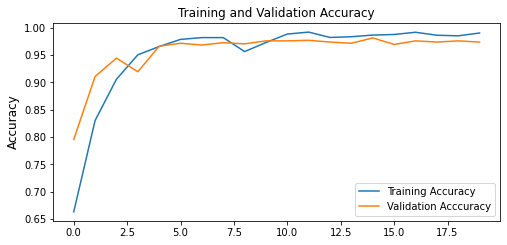

In [ ]:
acc = history.history["accuracy"] # report of model
val_acc = history.history["val_accuracy"] # history of validation data

loss = history.history["loss"]        # Training loss
val_loss = history.history["val_loss"] # validation loss

plt.figure(figsize=(8,8))
plt.subplot(2,1,1) # 2 rows and 1 columns
#plotting respective accuracy
plt.plot(acc,label="Training Accuracy")
plt.plot(val_acc, label="Validation Acccuracy")

plt.legend()
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training and Validation Accuracy", fontsize=12)

Text(0.5, 1.0, 'Training and Validation Losses')

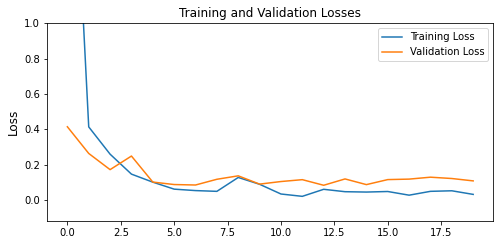

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
 
plt.plot(loss, label="Training Loss")      #Training loss
plt.plot(val_loss, label="Validation Loss") # Validation Loss

plt.legend()
plt.ylim([min(plt.ylim()),1])
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Losses", fontsize=12)

**5.Evaluating the model with callbacks**

In [ ]:
model.evaluate(test, verbose=1)

44/44 [==============================] - 17s 390ms/step - loss: 0.0726 - accuracy: 0.9826


[0.07256567478179932, 0.9826086759567261]

In [ ]:
pred = model.predict(test)
pred = np.argmax(pred, axis=1) #pick class with highest  probability

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

**6.Generating a classification report.**

In [ ]:
y_test = test_images.labels # set y_test to the expected output
print(classification_report(y_test, pred2))
print("Accuracy of the Model:",accuracy_score(y_test, pred2)*100,"%")

              precision    recall  f1-score   support

      cancer       0.98      0.99      0.98       779
     healthy       0.99      0.97      0.98       601

    accuracy                           0.98      1380
   macro avg       0.98      0.98      0.98      1380
weighted avg       0.98      0.98      0.98      1380

Accuracy of the Model: 98.26086956521739 %


**7. Generating a Confusion Matrix for the model with callbacks**

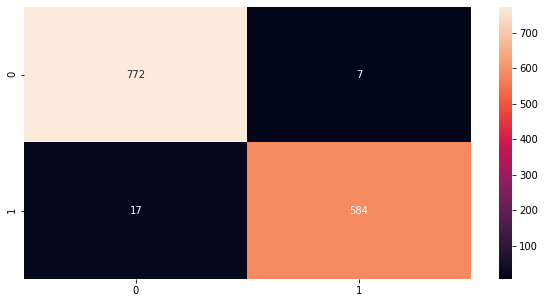

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize = (10,5))
cm = confusion_matrix(y_test, pred2)
sns.heatmap(cm, annot=True, fmt = 'g')

#**5. Testing the model**

###**Method1:** Using google.colab import files function to upload files and test the model whether its a cancer or healthy.

**Outputs:**

In output array if its **[[1. 0.]] it is a Cancer.** 

In output array if its **[[0. 1.]] it's  Healthy (Not Cancer).** 

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(244, 244))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving Not Cancer  (1).jpeg to Not Cancer  (1) (1).jpeg
Not Cancer  (1).jpeg
[[0. 1.]]


###**Method 2 :** Defining the function and then testing the model.

In [ ]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No,Its not a tumor'

100.0%Confidence This is Its a Tumor


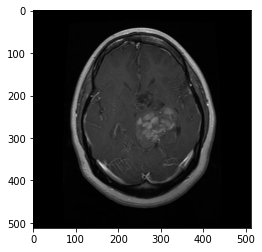

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg")
x = np.array(img.resize((244,244)))
x= x.reshape(1,244,244,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '%Confidence This is ' + names(classification))

# **6. Conclusion:**

In this way, 

1) I have implemented a CNN model with call backs and without call backs.

     1)The accuracy obtained for the model with call backs was: 98.62%

     2)The accuracy obtained for the model without call backs was: 98.26%

2) I have also visualized the graps for losses and accuracy for both the cases.

3) I have tested the model using google.colab import files function and by defining the functions for testing the model


# **7. References:**

1) https://online-journals.org/index.php/i-joe/article/view/18545

2) https://www.kdnuggets.com/2020/03/brain-tumor-detection-mask-r-cnn.html

3)T. Hossain, F. S. Shishir, M. Ashraf, M. A. Al Nasim and F. Muhammad Shah, "Brain Tumor Detection Using Convolutional Neural Network," 2019 1st International Conference on Advances in Science, Engineering and Robotics Technology (ICASERT), 2019, pp. 1-6, doi: 10.1109/ICASERT.2019.8934561.

4) Bhandari, A., Koppen, J. & Agzarian, M. Convolutional neural networks for brain tumour segmentation. Insights Imaging 11, 77 (2020). https://doi.org/10.1186/s13244-020-00869-4

5. Seetha J, Raja S. S. Brain Tumor Classification Using Convolutional Neural Networks. Biomed Pharmacol J 2018;11(3). Available from: http://biomedpharmajournal.org/?p=22844